In [3]:
# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Updated tickers: removed NVDA, added AAPL
tickers = ['AAPL', 'TSLA', 'PFE', 'BTC-USD', 'GLD', 'SPY']

# Download adjusted close prices directly
data = yf.download(tickers, start="2019-01-01", end="2025-01-01")

# Use 'Close' prices (yfinance now returns adjusted prices by default)
data = data['Close']

# Drop rows with missing values
data = data.dropna()

# Calculate daily returns
returns = data.pct_change().dropna()

# Quick look
returns.head()

[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,BTC-USD,GLD,PFE,SPY,TSLA
Date,,,,,,
2019-01-03,-0.099607,-0.027050,0.009066,-0.027977,-0.023863,-0.031472
2019-01-04,0.042689,0.005467,-0.008086,0.022836,0.033496,0.057697
2019-01-07,-0.002226,0.043427,0.003458,0.005349,0.007884,0.054361
2019-01-08,0.019063,0.001391,-0.002708,0.004626,0.009395,0.001164
2019-01-09,0.016982,0.001104,0.006418,-0.002073,0.004674,0.009483


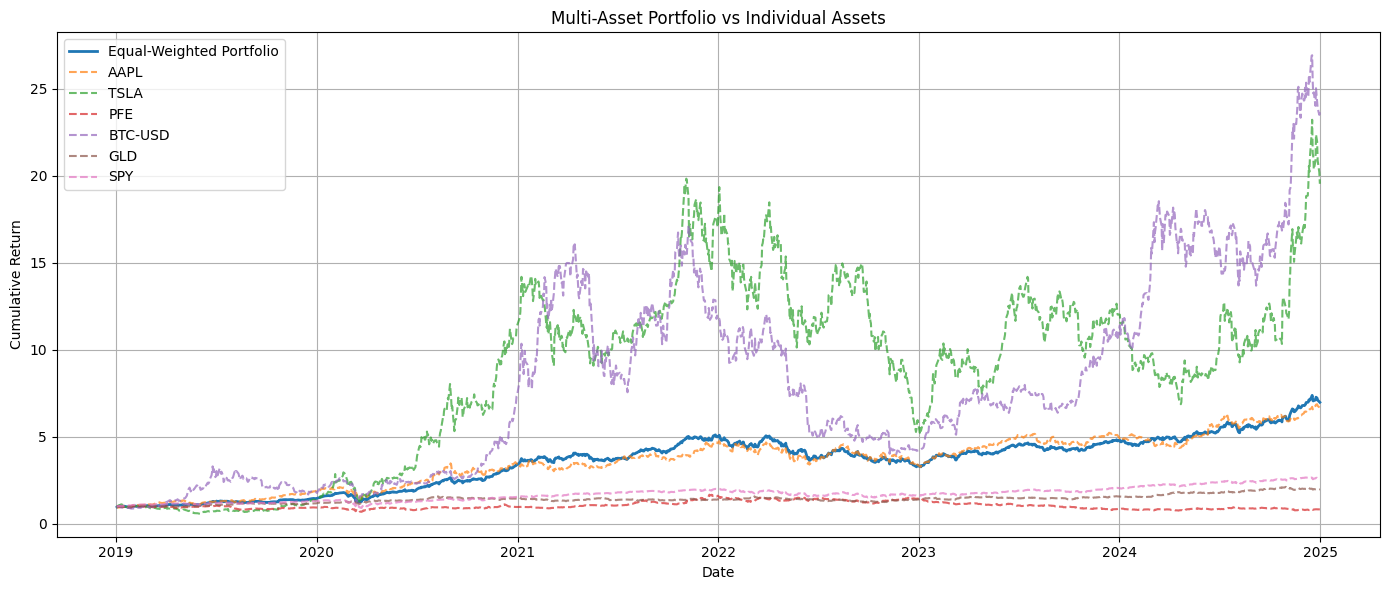

In [4]:
# Step 2: Equal-weighted portfolio simulation

# Create equal weights (each asset gets 1/n allocation)
weights = [1 / len(tickers)] * len(tickers)

# Calculate daily portfolio return using dot product
portfolio_returns = returns.dot(weights)

# Compute cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(cumulative_returns, label='Equal-Weighted Portfolio', linewidth=2)
for ticker in tickers:
    plt.plot((1 + returns[ticker]).cumprod(), label=ticker, linestyle='--', alpha=0.7)

plt.title("Multi-Asset Portfolio vs Individual Assets")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Step 3: Risk & performance metrics

# Total return
total_return = cumulative_returns.iloc[-1] - 1

# Annualized return
annualized_return = (1 + total_return) ** (1 / len(portfolio_returns) * 252) - 1

# Annualized volatility
volatility = portfolio_returns.std() * (252 ** 0.5)

# Sharpe ratio (assume risk-free rate = 0)
sharpe_ratio = annualized_return / volatility

# Max drawdown
rolling_max = cumulative_returns.cummax()
drawdown = cumulative_returns / rolling_max - 1
max_drawdown = drawdown.min()

# Print summary
print("📊 Portfolio Performance Summary")
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

📊 Portfolio Performance Summary
Total Return: 598.00%
Annualized Return: 38.33%
Annualized Volatility: 23.99%
Sharpe Ratio: 1.60
Max Drawdown: -35.90%


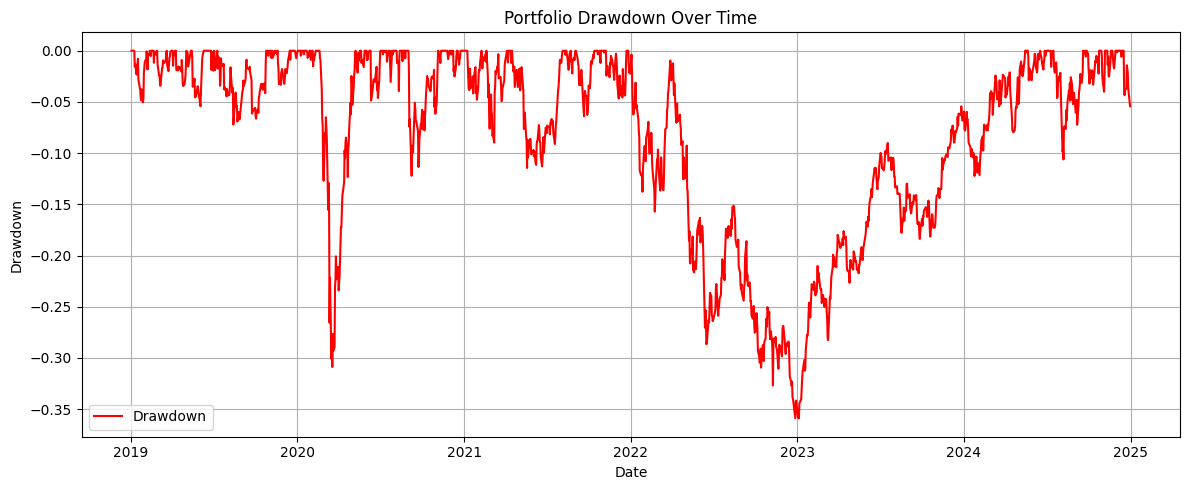

In [6]:
# Plot drawdown curve
plt.figure(figsize=(12, 5))
plt.plot(drawdown, color='red', label='Drawdown')
plt.title("Portfolio Drawdown Over Time")
plt.ylabel("Drawdown")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

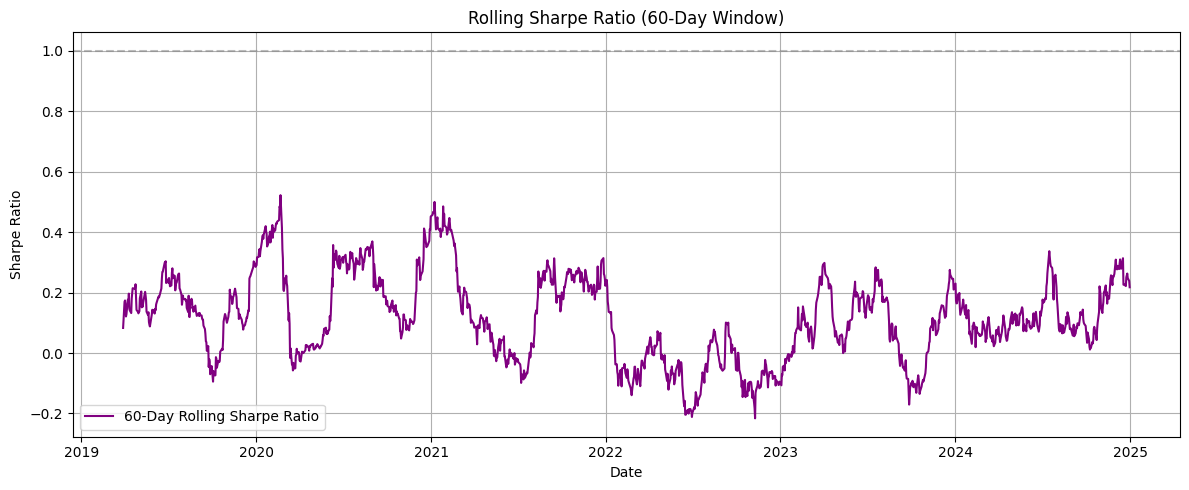

In [10]:
import numpy as np

# Calculate portfolio returns (equal weight by default)
portfolio_returns = returns.mean(axis=1)

# Calculate rolling Sharpe ratio with 60-day window
rolling_sharpe = portfolio_returns.rolling(window=60).mean() / portfolio_returns.rolling(window=60).std()

# Plot Rolling Sharpe Ratio
plt.figure(figsize=(12, 5))
plt.plot(rolling_sharpe, label='60-Day Rolling Sharpe Ratio', color='purple')
plt.axhline(1, linestyle='--', color='gray', alpha=0.5)
plt.title("Rolling Sharpe Ratio (60-Day Window)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rolling_sharpe.png")
plt.show()

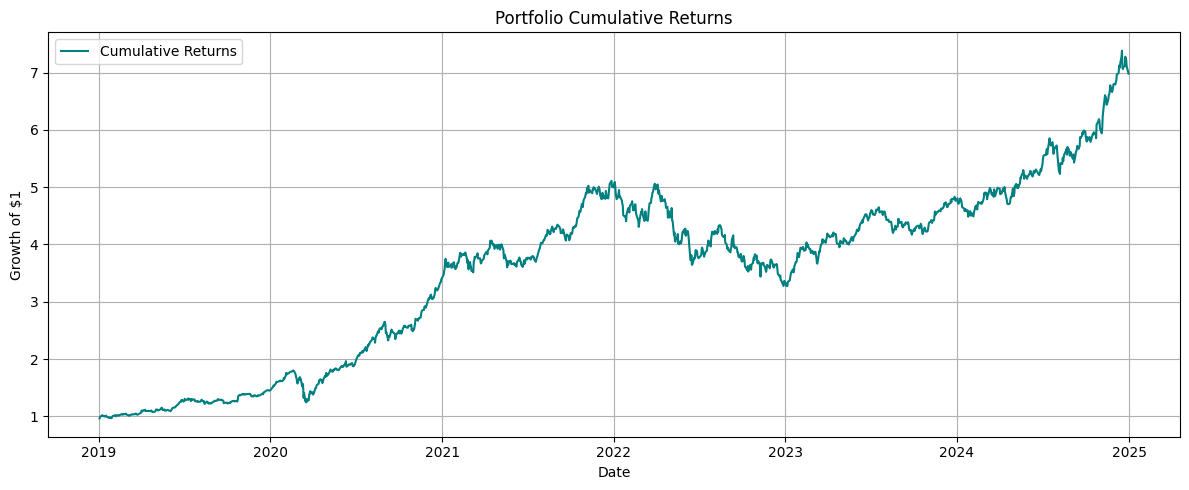

In [12]:
# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 5))
plt.plot(cumulative_returns, label='Cumulative Returns', color='teal')
plt.title("Portfolio Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the image before showing
plt.savefig("cumulative_returns.png")
plt.show()